In [71]:
#Import Libralies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import os
import random as rn

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)


2.5.0


In [72]:
# Function For Result Evaluation 
def metrics(y_true, y_pred):
    metrics = [
        r2_score(y_true=y_true, y_pred=y_pred), 
        np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred)), 
        mean_absolute_error(y_true=y_true, y_pred=y_pred)
    ]
    
    return metrics

In [73]:
# Function For Result Visualization
def yyplot(y_true, y_pred):
    yvalues = np.concatenate([y_true.flatten(), y_pred.flatten()])
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(y_true, y_pred, s=1.0)
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01], color="red", linestyle = "dashed")
    plt.grid(linestyle = "dashed")
    plt.xlim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.ylim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.xlabel('y: true value')
    plt.ylabel('y: predicted value')
    plt.title('True-Predicted Plot')
    plt.show()

    return fig

In [74]:
# Function to fix random seed
def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    rn.seed(seed) # Fixing the seed of a random function
    np.random.seed(seed) # Fixing the seed of numpy
    tf.random.set_seed(seed) # Fixing the seed of tensorflow

In [75]:
#Data Loading
import glob

#folder_path = input("Enter the path of the folder where the data is stored.")
#folder_path = "../../02_Operating_Data/" #CGH Updated
folder_path=r"/content/drive/MyDrive/Colab Notebooks/CGH/AID/Dataset"

# folder_path example: "C:\Users\AB280\Documents\GitHub\AIO_Regression\Dataset_generate\hysys_output\lng_production"

# # If pkl format, 
# all_files = glob.glob(folder_path + "\*.pkl")
# print(all_files)

# list = []
# for file_name in all_files:
#     df_each = pd.read_pickle(file_name)
#     list.append(df_each)
    
# df = pd.concat(list, axis=0, ignore_index=True)
# df.head(100)


# If csv format, 
all_files = glob.glob(folder_path + "/*.csv") #CPW Updated
print(all_files) #To Print File Names

list = []
for file_name in all_files:
    df_each = pd.read_csv(file_name)
    list.append(df_each)
    
df = pd.concat(list, axis=0, ignore_index=True) #To combine all files
#df.to_csv('all_years_combined.csv', index=False)
#df.head(100)

['/content/drive/MyDrive/Colab Notebooks/CGH/AID/Dataset/dslng_operating_data_hourly_R3.csv']


In [76]:
df=df.dropna()
#df.info()

In [77]:
dict_X = {'Unnamed: 0':'Date',
    '041AI1806A.PV':   'FEED_N2',
    '041AI1806B.PV':   'FEED_C1',
    '041AI1806C.PV':   'FEED_C2',
    '041AI1806D.PV':   'FEED_C3',
    '041AI1806E.PV':   'FEED_iC4',
    '041AI1806F.PV':   'FEED_nC4',
    '041AI1806G.PV':   'FEED_C5+',
    '060TI4001.PV':   'AmbTemp_1',
    '060TI4002.PV':   'AmbTemp_2',
    '091TI4002.PV':   'AmbTemp_5',
    '051TI1401A.PV':   'AirTemp_A',
    '051TI1401B.PV':   'AirTemp_B',
    '051TI1401C.PV':   'AirTemp_C',
    '051TI1401D.PV':   'AirTemp_D',
    '051TI1401E.PV':   'AirTemp_E',
    '051PI1251.PV':   'P_HPMR',
    '051PFIC2940.MV':   'COLD_JT',
    '051FIC1051.MV':   'WARM_JT',
    '051AI1781A.PV':   'MR_N2',
    '051AI1781B.PV':   'MR_C1',
    '051AI1781C.PV':   'MR_C2',
    '051AI1781D.PV':   'MR_C3',
    '041TI1313.PV':   'MCHE_OUT',
    '041PI1203.PV':   'MCHE_P_IN',
    '041FIC2430.PV':   'LNG_Rundown',
    '041AI1806H.PV':   'LNG_Dens',

    '071FI1021A.PV':   'LNG_Loading',
    '051SI3203.PV':   'C3_GT_Speed',
    '051SI3113.PV':   'LPMR_GT_Speed',
    '051SI3403.PV':   'HPMR_GT_Speed',
    '051FI1081.PV':   'Fuel_Flow_C3_Driver',


    '051FI1083.PV':   'Fuel_Flow_LPMR_Driver',


    '051FI1085.PV':   'Fuel_Flow_HPMR_Driver',


    '051XI4055.PV':   'Helper_Motor_C3',
    '051XI5055.PV':   'Helper_Motor_LPMR',


    '051TI1307.PV':   'C3_CON_OUT',
    '051TI1311.PV':   'C3_SUB_OUT',
    '051TI1351.PV':   'LPMR_OUT',
    '051TI1352.PV':   'HPMR_OUT',

    '051FI3121_N.PV':   'MR_FLOW',
    '051FI3041_N.PV':   'C3_FLOW',
    '051PI3110.PV':  'LPMR_Suc_P',  #New Feature — Case 2 Input
    '051TI1370.PV':   'MR_Return_T',
    '041TI1306.PV':   'FEED_MCHE_IN_T'	 #Case 4 Input
}
col_names=df.columns.tolist()
new_names=[dict_X.get(each,each) for each in col_names]
df.columns=new_names
#df.to_csv("Col Names.csv",index=False)

In [78]:
#Preparation for SpecPower Calculation
#As per Note-3, Holding Mode: Loading Rate ≒ 0 and Rundown Rate > 85% * Max
df = df[df["LNG_Loading"]<=0]
df = df[df["LNG_Rundown"]>=(df["LNG_Rundown"].max()*.85)]

#Calculations for LNG Prod & Others
df["LNG_Prod"]=df["LNG_Rundown"] * df["LNG_Dens"]/1000

df["Fuel_WtFlow_C3_Driver"]=df["Fuel_Flow_C3_Driver"]  / 22.414 * 17.44

df["C3_GT_Power"]=df["Fuel_WtFlow_C3_Driver"] * 50044 / (26.059873 * df["AmbTemp_2"] - 0.848894 * df["C3_GT_Speed"]  + 15378.1778218)

df["Fuel_WtFlow_LPMR_Driver"]=df["Fuel_Flow_LPMR_Driver"] / 22.414 * 17.44

df["LPMR_GT_Power"]=df["Fuel_WtFlow_LPMR_Driver"] * 50044 / (26.059873 * df["AmbTemp_2"] - 0.848894 * df["LPMR_GT_Speed"]  + 15378.1778218)

df["Fuel_WtFlow_HPMR_Driver"]=df["Fuel_Flow_HPMR_Driver"] / 22.414 * 17.44

df["HPMR_GT_Power"]=df["Fuel_WtFlow_HPMR_Driver"] * 50044 / (26.059873 * df["AmbTemp_2"] - 0.848894 * df["HPMR_GT_Speed"]  + 15378.1778218)

df["MCHE_BTM_DT"]=df["FEED_MCHE_IN_T"]-df["MR_Return_T"]
#SpecPower can be calculated now.
df["SpecPower"]=(df["C3_GT_Power"]+ df["LPMR_GT_Power"] + df["HPMR_GT_Power"] + df["Helper_Motor_C3"] + df["Helper_Motor_LPMR"]) / df["LNG_Prod"]

df=df.dropna() #Some Values might be zero and thus result in N/A.
#df.info()

In [79]:
# explanatory variables
list_X = [
'FEED_N2',
'FEED_C1',
'FEED_C2',
'FEED_C3',
'MCHE_P_IN',
'AmbTemp_2',
'P_HPMR',
'MR_N2',
'MR_C1',
'MR_C2',
'MR_C3',
'MCHE_BTM_DT', 
'LPMR_Suc_P',
'MCHE_OUT',
'C3_CON_OUT'
]

# target variable
list_y = [
    'SpecPower' 
]

In [80]:
#Standarditizing the data 
sc_X = preprocessing.StandardScaler()
sc_y = preprocessing.StandardScaler()

X = df.loc[:, list_X].values
y = df.loc[:, list_y].values

X_std = sc_X.fit_transform(X)
y_std = sc_y.fit_transform(y)

#sc_X.fit(X=X)
#sc_y.fit(X=y)
X_std.mean(axis=0), y_std.mean(axis=0)

(array([-8.26029780e-16, -1.23792235e-15, -9.33772794e-16,  5.02800735e-15,
        -1.23545324e-14, -5.02800735e-16,  8.29845678e-15, -3.23229044e-16,
         7.18286765e-17, -4.66886397e-16, -9.33772794e-16,  1.43657353e-16,
         8.97858456e-17,  2.15845173e-14, -1.79571691e-15]),
 array([-1.40065919e-15]))

In [81]:
#Data  Separating
from sklearn.utils import shuffle
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.10, random_state=0,shuffle=False) #It is learned not to shuffle.


In [82]:
#Definition of neural networks and optimization functions using Sequential models
# Fixing Random Seed
reset_seed(0)

# Building the Model
input_dim = X.shape[1]
output_dim = y.shape[1]

model = Sequential()
model.add(Dense(units=100,input_dim=input_dim))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=output_dim))
#keras.layers.Dropout(0.9)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Optimizer, Setting the Learning Rate（Defaults to 0.001)
#opt='RMSprop'
model.compile(loss='mse', optimizer=opt,metrics=['accuracy']) 
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 100)               1600      
_________________________________________________________________
dense_25 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_26 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 21        
Total params: 7,691
Trainable params: 7,691
Non-trainable params: 0
_________________________________________________________________


In [83]:
%%time
# Learning Execution
batchsize = 256 # 2^10
epoch = 5000
es = EarlyStopping(monitor="val_loss", patience=100, verbose=1, restore_best_weights=True)
history = model.fit(
    x=X_train, y=y_train, batch_size=batchsize, epochs=epoch, 
    verbose=1, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/5000
45/45 [==============================] - 1s 5ms/step - loss: 0.9153 - accuracy: 0.0000e+00 - val_loss: 0.9229 - val_accuracy: 0.0000e+00
Epoch 2/5000
45/45 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.0000e+00 - val_loss: 0.8332 - val_accuracy: 0.0000e+00
Epoch 3/5000
45/45 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.0000e+00 - val_loss: 0.7541 - val_accuracy: 0.0000e+00
Epoch 4/5000
45/45 [==============================] - 0s 3ms/step - loss: 0.3508 - accuracy: 0.0000e+00 - val_loss: 0.7027 - val_accuracy: 0.0000e+00
Epoch 5/5000
45/45 [==============================] - 0s 3ms/step - loss: 0.2923 - accuracy: 0.0000e+00 - val_loss: 0.6817 - val_accuracy: 0.0000e+00
Epoch 6/5000
45/45 [==============================] - 0s 3ms/step - loss: 0.2594 - accuracy: 0.0000e+00 - val_loss: 0.6571 - val_accuracy: 0.0000e+00
Epoch 7/5000
45/45 [==============================] - 0s 3ms/step - loss: 0.2355 - accuracy: 0.0000e

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

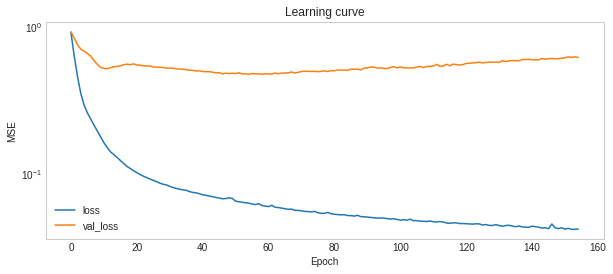

In [84]:
#Create Graph
plt.figure(figsize=(10, 4))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss') # Validation Loss

plt.title(label='Learning curve')
plt.xlabel(xlabel='Epoch')
plt.ylabel(ylabel='MSE')

plt.legend()
plt.yscale('log')
plt.grid()
history.history.keys()

In [85]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1,1)

y_pred =sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test =sc_X.inverse_transform(X_test)
y_train=sc_y.inverse_transform(y_train)
X_train=sc_X.inverse_transform(X_train)

mtrc = metrics(y_true=y_test, y_pred=y_pred)

print("r2:          %.4f" % mtrc[0])
print("rmse:        %.4f" % mtrc[1])
print("rmse / avg.: %.4f" % (mtrc[1] / y_test.mean()))
print("mae:         %.4f" % mtrc[2])
print("mae / avg.:  %.4f" % (mtrc[2] / y_test.mean()))

r2:          0.4364
rmse:        3.7091
rmse / avg.: 0.0108
mae:         2.8873
mae / avg.:  0.0084


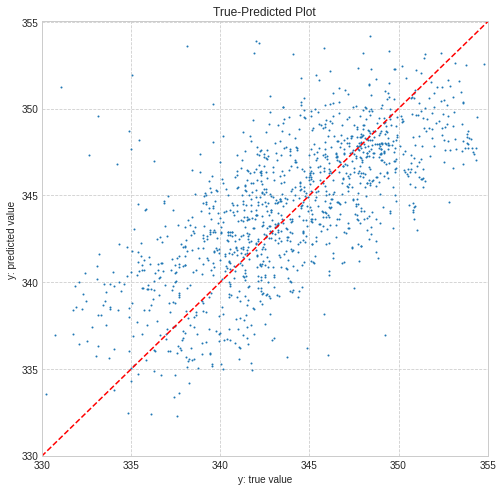

In [86]:
fig = yyplot(y_true = y_test, y_pred = y_pred)

In [87]:
# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/CGH/AID/Step3_Regression/Output/LNG_SpecPower.h5')

from pickle import dump
dump(sc_X, open('/content/drive/MyDrive/Colab Notebooks/CGH/AID/Step3_Regression/Output/LNG_SpecPower_Scaler_Input.pkl', 'wb'))
dump(sc_y, open('/content/drive/MyDrive/Colab Notebooks/CGH/AID/Step3_Regression/Output/LNG_SpecPower_Scaler_Output.pkl', 'wb'))